In [19]:
import pandas as pd
import numpy as np
import os 
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [20]:
#merging processed file into raw merge file for further processing
here = Path.cwd()
root = next(p for p in [here, *here.parents] if (p / "data" / "processed").exists())

#creating 2 columns to identify source file and if ios or android
df = pd.read_csv(root / "data" / "processed" / "merged" / "parent_clean.csv", header=0)
df.head()

,is_ios,source_file,eventType,eventSampleSpeed,eventDurationSeconds,eventMilesDriven,eventSensorDetectionMthd,eventGPSSignalStrength,eventStartSpeed,eventEndSpeed,...,gpsP75LateralAccel,gpsP95LateralAccel,bearing_angular_change_per_second,gyro_angular_change_per_second,bearingAngleChange,gyroAngleChange,mems_radius,gps_radius,speed_gap,aggressive
0,0,android_turns.csv,4.0,10.394929,7.244125,0.016991,2.0,1.480796,17.323687,6.789408,...,0.800598,0.854956,8.662511,9.521707,67.596880,69.319600,22.941639,20.335337,-10.534279,0
1,0,android_turns.csv,4.0,9.401910,7.497719,0.016103,2.0,1.693853,6.197542,10.101060,...,1.051501,1.147173,9.708605,11.245602,80.071320,84.723694,20.737572,21.819538,3.903518,0
2,0,android_turns.csv,5.0,11.290954,4.244563,0.008359,2.0,21.173470,11.229438,9.081976,...,1.494703,1.494703,11.732657,24.616348,44.000920,105.462135,18.996666,29.467962,-2.147462,0
3,0,android_turns.csv,5.0,12.743101,3.173500,0.007654,1.0,15.306123,10.714942,13.421639,...,1.770240,1.770240,10.335592,17.929585,45.601433,57.610783,23.959110,21.440578,2.706697,0
4,0,android_turns.csv,5.0,8.986107,5.990321,0.013587,0.0,19.387754,2.729067,20.937756,...,1.698927,2.619599,11.501888,2.787075,74.401410,16.806042,91.713660,12.708904,18.208689,0


In [21]:
df.columns.tolist()

['is_ios',
 'source_file',
 'eventType',
 'eventSampleSpeed',
 'eventDurationSeconds',
 'eventMilesDriven',
 'eventSensorDetectionMthd',
 'eventGPSSignalStrength',
 'eventStartSpeed',
 'eventEndSpeed',
 'memsMedianLateralAccel',
 'memsP75LateralAccel',
 'memsP95LateralAccel',
 'memsMedianHorizontalNorm',
 'memsP75HorizontalNorm',
 'memsP95HorizontalNorm',
 'gpsMedianLateralAccel',
 'gpsP75LateralAccel',
 'gpsP95LateralAccel',
 'bearing_angular_change_per_second',
 'gyro_angular_change_per_second',
 'bearingAngleChange',
 'gyroAngleChange',
 'mems_radius',
 'gps_radius',
 'speed_gap',
 'aggressive']

In [22]:
df['eventSensorDetectionMthd'] = pd.to_numeric(df['eventSensorDetectionMthd'], errors='coerce')
df = df.dropna(subset=['eventSensorDetectionMthd'])
df['eventSensorDetectionMthd'] = df['eventSensorDetectionMthd'].astype(int)

df = df[df['eventSensorDetectionMthd'] == 1].copy()
print(df['eventSensorDetectionMthd'].unique())

[1]


In [23]:
# columns to keep (with the earlier-dropped ones removed)
keep_cols = [
    'is_ios',
    'source_file',
    "eventType",
    "eventSampleSpeed",
    "eventDurationSeconds",
    "eventMilesDriven",
    "eventSensorDetectionMthd",
    "eventGPSSignalStrength",
    "eventStartSpeed",
    "eventEndSpeed",
    "memsMedianHorizontalNorm",
    "memsP75HorizontalNorm",
    "memsP95HorizontalNorm",
    "gyro_angular_change_per_second",
    "gyroAngleChange",
    "mems_radius"
]

# keep only these columns
df = df[[c for c in keep_cols if c in df.columns]]

print(df.columns.to_list())

['is_ios', 'source_file', 'eventType', 'eventSampleSpeed', 'eventDurationSeconds', 'eventMilesDriven', 'eventSensorDetectionMthd', 'eventGPSSignalStrength', 'eventStartSpeed', 'eventEndSpeed', 'memsMedianHorizontalNorm', 'memsP75HorizontalNorm', 'memsP95HorizontalNorm', 'gyro_angular_change_per_second', 'gyroAngleChange', 'mems_radius']


In [24]:
df.shape

(7310, 16)

In [25]:
df.groupby("source_file")["memsMedianHorizontalNorm"].describe()

,count,mean,std,min,25%,50%,75%,max
source_file,,,,,,,,
android_turns.csv,242.0,1.880268,0.729621,0.220557,1.409384,1.831711,2.272722,4.922246
ios_turns.csv,7068.0,2.066178,0.784852,0.292356,1.522994,2.011980,2.516937,7.784428


/var/folders/gb/z580gbzd2snggl2ym34nk9000000gn/T/ipykernel_365/3200314501.py:8: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([ios_data, android_data],


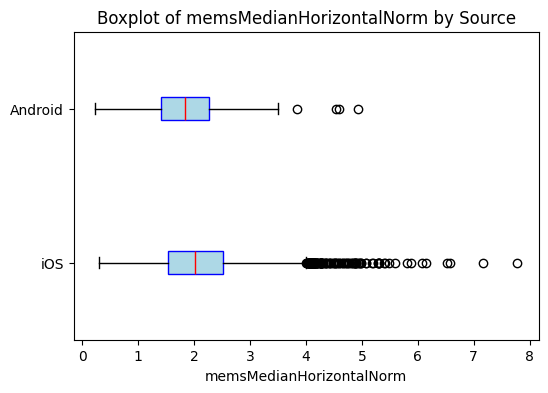

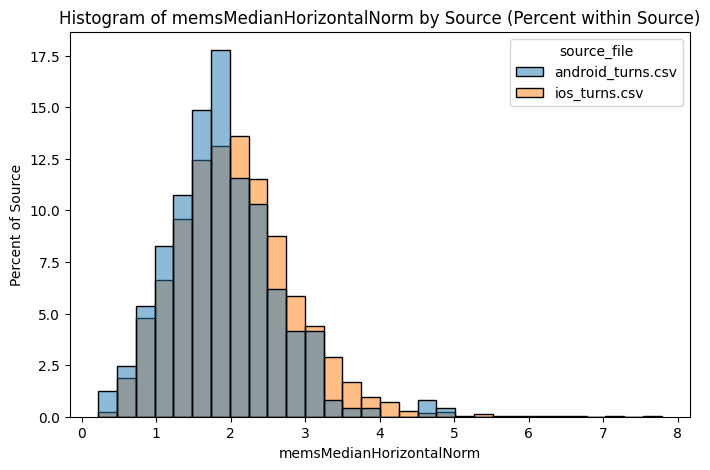

In [26]:
plt.figure(figsize=(6,4))

# Split data
ios_data = df[df['is_ios'] == 1]['memsMedianHorizontalNorm']
android_data = df[df['is_ios'] == 0]['memsMedianHorizontalNorm']

# Make two horizontal boxplots side by side
plt.boxplot([ios_data, android_data],
            vert=False,
            labels=["iOS", "Android"],
            patch_artist=True,   # lets us color them
            boxprops=dict(facecolor="lightblue", color="blue"),
            medianprops=dict(color="red"),
            )

plt.title("Boxplot of memsMedianHorizontalNorm by Source")
plt.xlabel("memsMedianHorizontalNorm")
plt.show()

plt.figure(figsize=(8,5))
sns.histplot(
    data=df, 
    x="memsMedianHorizontalNorm", 
    hue="source_file", 
    stat="percent",        
    common_norm=False,     
    bins=30, 
    edgecolor="black"
)

plt.title("Histogram of memsMedianHorizontalNorm by Source (Percent within Source)")
plt.xlabel("memsMedianHorizontalNorm")
plt.ylabel("Percent of Source")
plt.show()

In [27]:
df[df['memsMedianHorizontalNorm'] > 15]

,is_ios,source_file,eventType,eventSampleSpeed,eventDurationSeconds,eventMilesDriven,eventSensorDetectionMthd,eventGPSSignalStrength,eventStartSpeed,eventEndSpeed,memsMedianHorizontalNorm,memsP75HorizontalNorm,memsP95HorizontalNorm,gyro_angular_change_per_second,gyroAngleChange,mems_radius


/var/folders/gb/z580gbzd2snggl2ym34nk9000000gn/T/ipykernel_365/3245568579.py:8: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([ios_data, android_data],


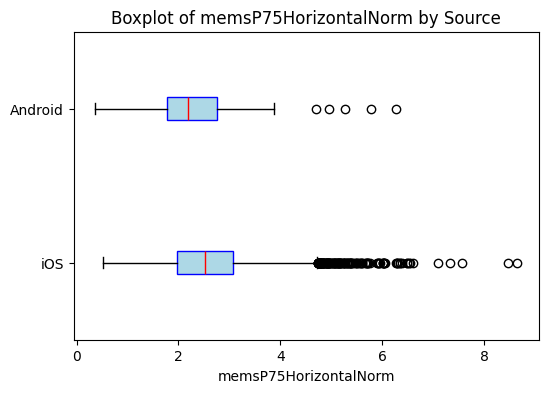

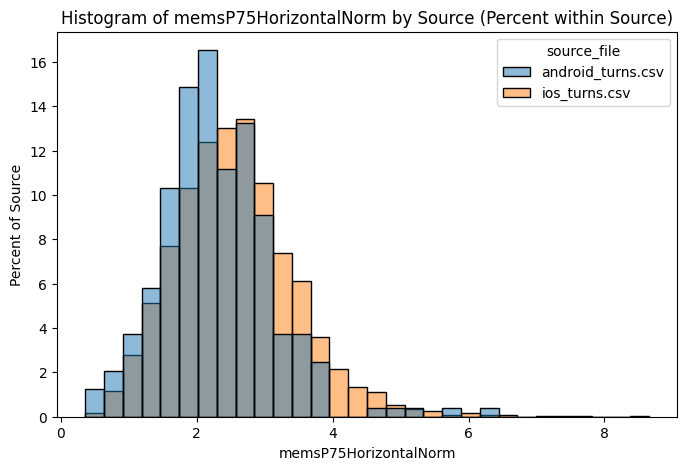

In [28]:
plt.figure(figsize=(6,4))

# Split data
ios_data = df[df['is_ios'] == 1]['memsP75HorizontalNorm']
android_data = df[df['is_ios'] == 0]['memsP75HorizontalNorm']

# Make two horizontal boxplots side by side
plt.boxplot([ios_data, android_data],
            vert=False,
            labels=["iOS", "Android"],
            patch_artist=True,   # lets us color them
            boxprops=dict(facecolor="lightblue", color="blue"),
            medianprops=dict(color="red"),
            )

plt.title("Boxplot of memsP75HorizontalNorm by Source")
plt.xlabel("memsP75HorizontalNorm")
plt.show()

plt.figure(figsize=(8,5))
sns.histplot(
    data=df, 
    x="memsP75HorizontalNorm", 
    hue="source_file", 
    stat="percent",        
    common_norm=False,     
    bins=30, 
    edgecolor="black"
)

plt.title("Histogram of memsP75HorizontalNorm by Source (Percent within Source)")
plt.xlabel("memsP75HorizontalNorm")
plt.ylabel("Percent of Source")
plt.show()

In [29]:
df[(df['memsP75HorizontalNorm'] > 15) & (df['source_file'] == 'android_turns.csv')]

,is_ios,source_file,eventType,eventSampleSpeed,eventDurationSeconds,eventMilesDriven,eventSensorDetectionMthd,eventGPSSignalStrength,eventStartSpeed,eventEndSpeed,memsMedianHorizontalNorm,memsP75HorizontalNorm,memsP95HorizontalNorm,gyro_angular_change_per_second,gyroAngleChange,mems_radius


/var/folders/gb/z580gbzd2snggl2ym34nk9000000gn/T/ipykernel_365/836768223.py:8: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([ios_data, android_data],


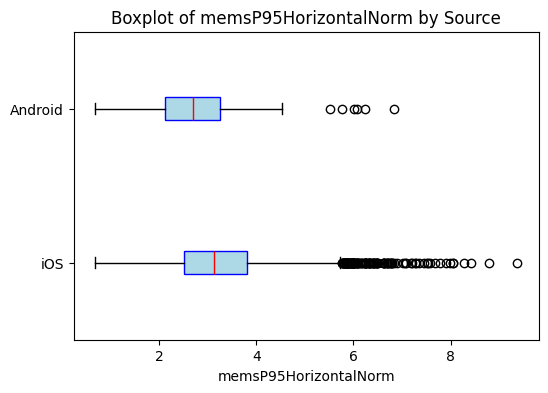

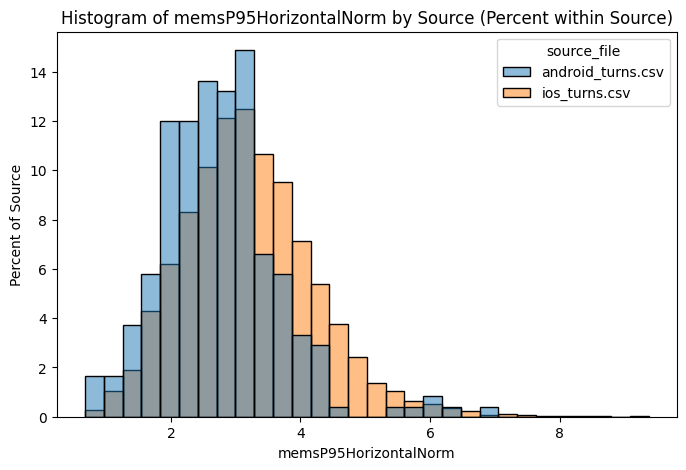

In [30]:
plt.figure(figsize=(6,4))

# Split data
ios_data = df[df['is_ios'] == 1]['memsP95HorizontalNorm']
android_data = df[df['is_ios'] == 0]['memsP95HorizontalNorm']

# Make two horizontal boxplots side by side
plt.boxplot([ios_data, android_data],
            vert=False,
            labels=["iOS", "Android"],
            patch_artist=True,   # lets us color them
            boxprops=dict(facecolor="lightblue", color="blue"),
            medianprops=dict(color="red"),
            )

plt.title("Boxplot of memsP95HorizontalNorm by Source")
plt.xlabel("memsP95HorizontalNorm")
plt.show()

plt.figure(figsize=(8,5))
sns.histplot(
    data=df, 
    x="memsP95HorizontalNorm", 
    hue="source_file", 
    stat="percent",        
    common_norm=False,     
    bins=30, 
    edgecolor="black"
)

plt.title("Histogram of memsP95HorizontalNorm by Source (Percent within Source)")
plt.xlabel("memsP95HorizontalNorm")
plt.ylabel("Percent of Source")
plt.show()

/var/folders/gb/z580gbzd2snggl2ym34nk9000000gn/T/ipykernel_365/1063449005.py:8: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([ios_data, android_data],


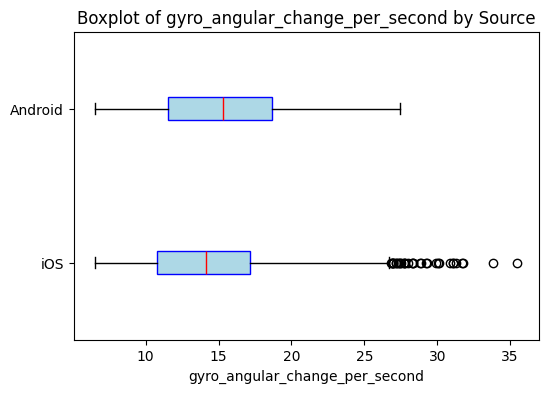

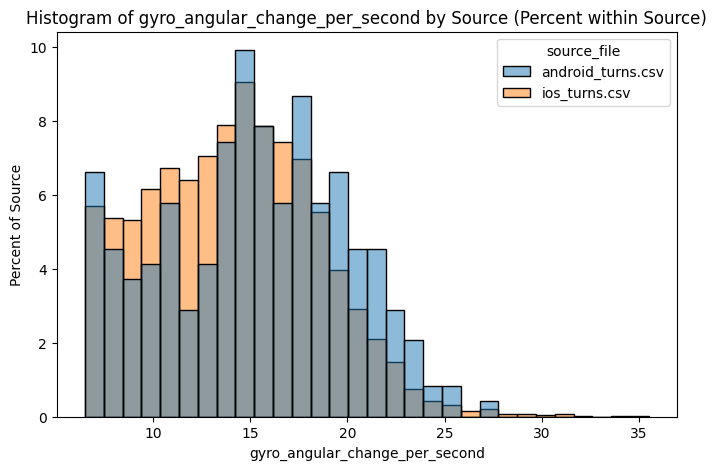

In [31]:
plt.figure(figsize=(6,4))

# Split data
ios_data = df[df['is_ios'] == 1]['gyro_angular_change_per_second']
android_data = df[df['is_ios'] == 0]['gyro_angular_change_per_second']

# Make two horizontal boxplots side by side
plt.boxplot([ios_data, android_data],
            vert=False,
            labels=["iOS", "Android"],
            patch_artist=True,   # lets us color them
            boxprops=dict(facecolor="lightblue", color="blue"),
            medianprops=dict(color="red"),
            )

plt.title("Boxplot of gyro_angular_change_per_second by Source")
plt.xlabel("gyro_angular_change_per_second")
plt.show()

plt.figure(figsize=(8,5))
sns.histplot(
    data=df, 
    x="gyro_angular_change_per_second", 
    hue="source_file", 
    stat="percent",        
    common_norm=False,     
    bins=30, 
    edgecolor="black"
)

plt.title("Histogram of gyro_angular_change_per_second by Source (Percent within Source)")
plt.xlabel("gyro_angular_change_per_second")
plt.ylabel("Percent of Source")
plt.show()

In [32]:
df[df['gyro_angular_change_per_second'] > 100]

,is_ios,source_file,eventType,eventSampleSpeed,eventDurationSeconds,eventMilesDriven,eventSensorDetectionMthd,eventGPSSignalStrength,eventStartSpeed,eventEndSpeed,memsMedianHorizontalNorm,memsP75HorizontalNorm,memsP95HorizontalNorm,gyro_angular_change_per_second,gyroAngleChange,mems_radius


/var/folders/gb/z580gbzd2snggl2ym34nk9000000gn/T/ipykernel_365/4053563035.py:8: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([ios_data, android_data],


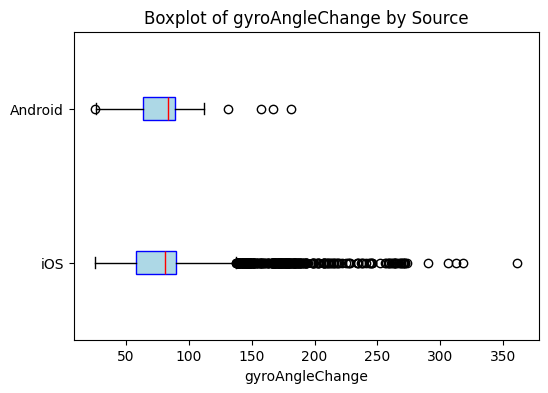

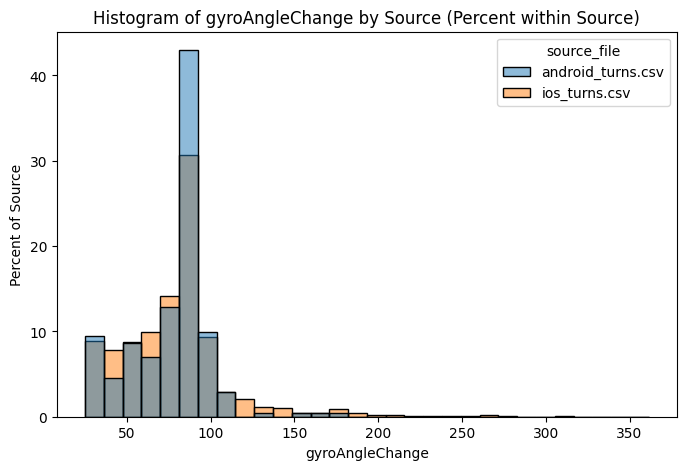

In [33]:
plt.figure(figsize=(6,4))

# Split data
ios_data = df[df['is_ios'] == 1]['gyroAngleChange']
android_data = df[df['is_ios'] == 0]['gyroAngleChange']

# Make two horizontal boxplots side by side
plt.boxplot([ios_data, android_data],
            vert=False,
            labels=["iOS", "Android"],
            patch_artist=True,   # lets us color them
            boxprops=dict(facecolor="lightblue", color="blue"),
            medianprops=dict(color="red"),
            )

plt.title("Boxplot of gyroAngleChange by Source")
plt.xlabel("gyroAngleChange")
plt.show()

plt.figure(figsize=(8,5))
sns.histplot(
    data=df, 
    x="gyroAngleChange", 
    hue="source_file", 
    stat="percent",        
    common_norm=False,     
    bins=30, 
    edgecolor="black"
)

plt.title("Histogram of gyroAngleChange by Source (Percent within Source)")
plt.xlabel("gyroAngleChange")
plt.ylabel("Percent of Source")
plt.show()

/var/folders/gb/z580gbzd2snggl2ym34nk9000000gn/T/ipykernel_365/2416860586.py:8: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([ios_data, android_data],


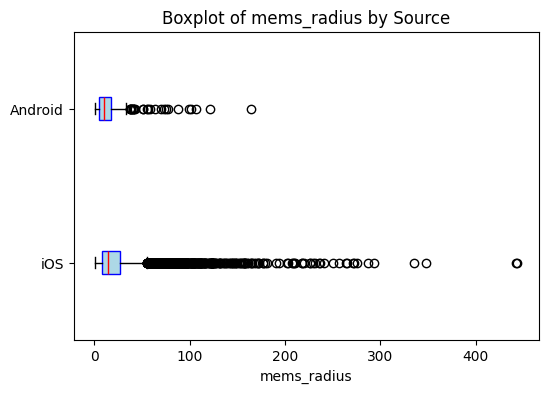

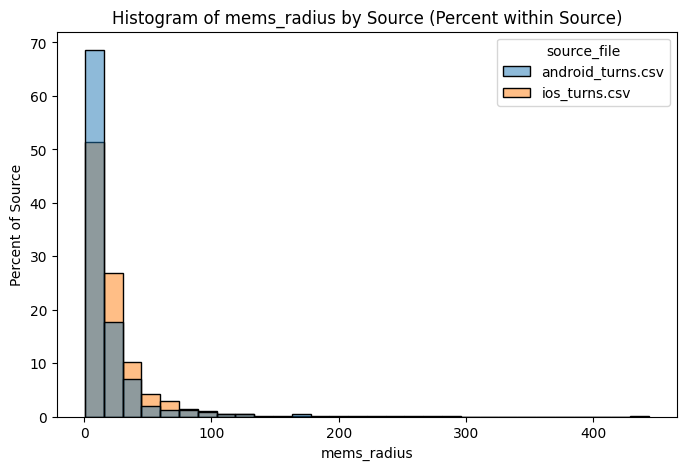

In [34]:
plt.figure(figsize=(6,4))

# Split data
ios_data = df[df['is_ios'] == 1]['mems_radius']
android_data = df[df['is_ios'] == 0]['mems_radius']

# Make two horizontal boxplots side by side
plt.boxplot([ios_data, android_data],
            vert=False,
            labels=["iOS", "Android"],
            patch_artist=True,   # lets us color them
            boxprops=dict(facecolor="lightblue", color="blue"),
            medianprops=dict(color="red"),
            )

plt.title("Boxplot of mems_radius by Source")
plt.xlabel("mems_radius")
plt.show()

plt.figure(figsize=(8,5))
sns.histplot(
    data=df, 
    x="mems_radius", 
    hue="source_file", 
    stat="percent",        
    common_norm=False,     
    bins=30, 
    edgecolor="black"
)

plt.title("Histogram of mems_radius by Source (Percent within Source)")
plt.xlabel("mems_radius")
plt.ylabel("Percent of Source")
plt.show()

In [35]:
df['mems_radius'].describe()

count    7310.000000
mean       22.953908
std        27.586448
min         0.640292
25%         8.011672
50%        14.806326
75%        26.715545
max       443.719570
Name: mems_radius, dtype: float64

In [36]:
df[df['mems_radius'] > 1000]

,is_ios,source_file,eventType,eventSampleSpeed,eventDurationSeconds,eventMilesDriven,eventSensorDetectionMthd,eventGPSSignalStrength,eventStartSpeed,eventEndSpeed,memsMedianHorizontalNorm,memsP75HorizontalNorm,memsP95HorizontalNorm,gyro_angular_change_per_second,gyroAngleChange,mems_radius


In [37]:
# find all infinite values in mems_radius
df[np.isinf(df['mems_radius'])]

,is_ios,source_file,eventType,eventSampleSpeed,eventDurationSeconds,eventMilesDriven,eventSensorDetectionMthd,eventGPSSignalStrength,eventStartSpeed,eventEndSpeed,memsMedianHorizontalNorm,memsP75HorizontalNorm,memsP95HorizontalNorm,gyro_angular_change_per_second,gyroAngleChange,mems_radius


/var/folders/gb/z580gbzd2snggl2ym34nk9000000gn/T/ipykernel_365/2324194745.py:15: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(


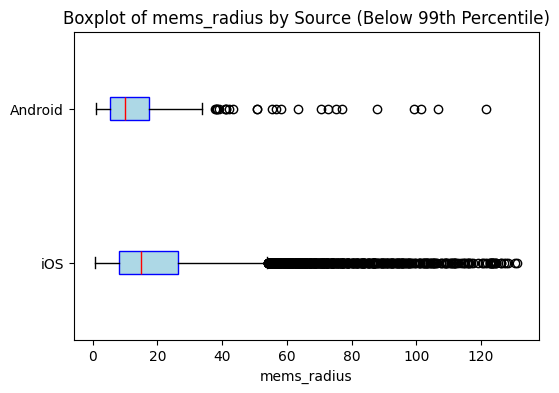

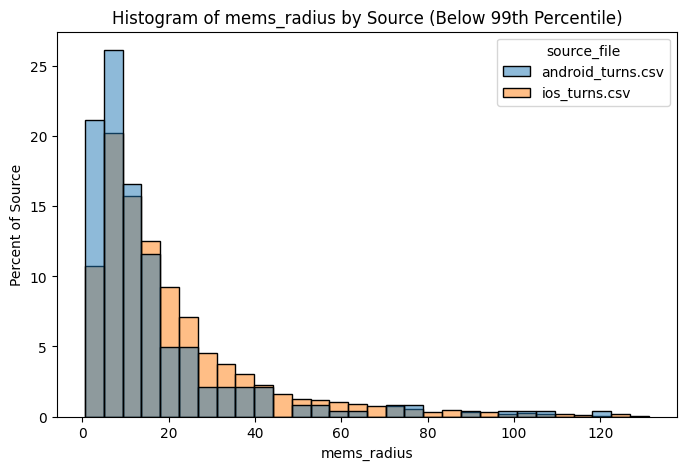

Original size: 7310
New size: 7236
Difference: 74


In [38]:
# Compute 99th percentile threshold
Q = df['mems_radius'].quantile(0.99)

# Create a filtered copy without altering the original DataFrame
new_df = df[df['mems_radius'] <= Q].copy()

# ---------------------- BOX PLOT ----------------------
plt.figure(figsize=(6,4))

# Split filtered data by source
ios_data = new_df[new_df['is_ios'] == 1]['mems_radius']
android_data = new_df[new_df['is_ios'] == 0]['mems_radius']

# Make two horizontal boxplots side by side
plt.boxplot(
    [ios_data, android_data],
    vert=False,
    labels=["iOS", "Android"],
    patch_artist=True,   # enables color fill
    boxprops=dict(facecolor="lightblue", color="blue"),
    medianprops=dict(color="red"),
)

plt.title("Boxplot of mems_radius by Source (Below 99th Percentile)")
plt.xlabel("mems_radius")
plt.show()

# ---------------------- HISTOGRAM ----------------------
plt.figure(figsize=(8,5))
sns.histplot(
    data=new_df, 
    x="mems_radius", 
    hue="source_file", 
    stat="percent",        
    common_norm=False,     
    bins=30, 
    edgecolor="black"
)

plt.title("Histogram of mems_radius by Source (Below 99th Percentile)")
plt.xlabel("mems_radius")
plt.ylabel("Percent of Source")
plt.show()

print(f"Original size: {df.shape[0]}\nNew size: {new_df.shape[0]}\nDifference: {df.shape[0] - new_df.shape[0]}")

/var/folders/gb/z580gbzd2snggl2ym34nk9000000gn/T/ipykernel_365/2550086605.py:15: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(


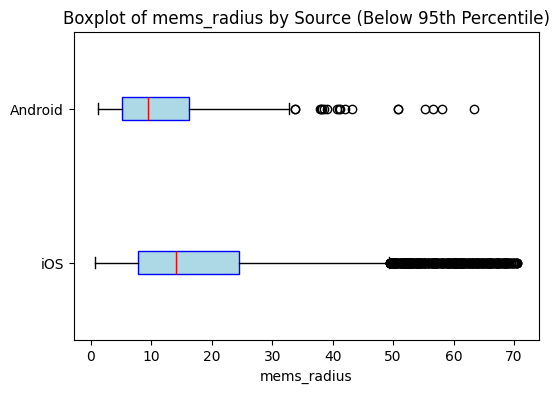

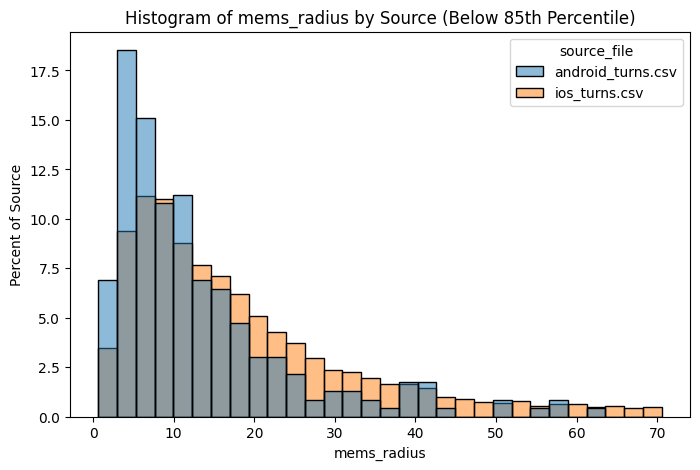

Original size: 7310
New size: 6944
Difference: 366


In [39]:
# Compute 95th percentile threshold
Q = df['mems_radius'].quantile(0.95)

# Create a filtered copy without altering the original DataFrame
new_df = df[df['mems_radius'] <= Q].copy()

# ---------------------- BOX PLOT ----------------------
plt.figure(figsize=(6,4))

# Split filtered data by source
ios_data = new_df[new_df['is_ios'] == 1]['mems_radius']
android_data = new_df[new_df['is_ios'] == 0]['mems_radius']

# Make two horizontal boxplots side by side
plt.boxplot(
    [ios_data, android_data],
    vert=False,
    labels=["iOS", "Android"],
    patch_artist=True,   # enables color fill
    boxprops=dict(facecolor="lightblue", color="blue"),
    medianprops=dict(color="red"),
)

plt.title("Boxplot of mems_radius by Source (Below 95th Percentile)")
plt.xlabel("mems_radius")
plt.show()

# ---------------------- HISTOGRAM ----------------------
plt.figure(figsize=(8,5))
sns.histplot(
    data=new_df, 
    x="mems_radius", 
    hue="source_file", 
    stat="percent",        
    common_norm=False,     
    bins=30, 
    edgecolor="black"
)

plt.title("Histogram of mems_radius by Source (Below 85th Percentile)")
plt.xlabel("mems_radius")
plt.ylabel("Percent of Source")
plt.show()

print(f"Original size: {df.shape[0]}\nNew size: {new_df.shape[0]}\nDifference: {df.shape[0] - new_df.shape[0]}")

/var/folders/gb/z580gbzd2snggl2ym34nk9000000gn/T/ipykernel_365/3732571146.py:15: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(


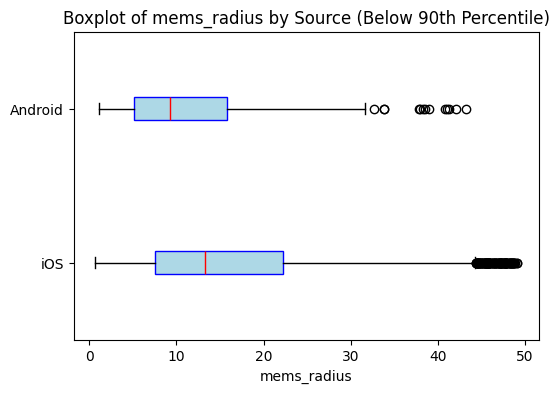

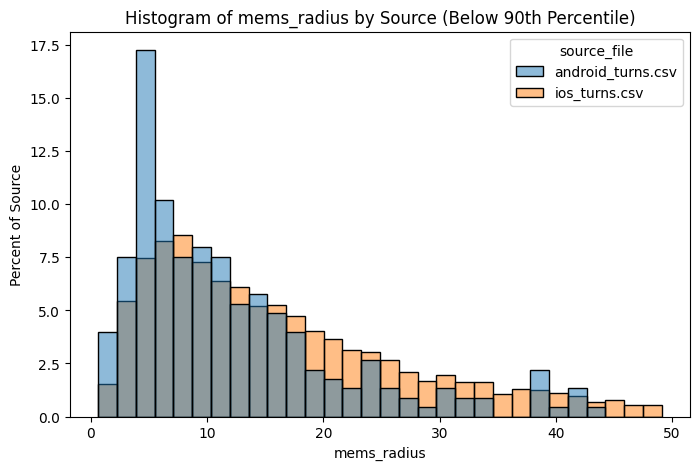

Original size: 7310
New size: 6579
Difference: 731


In [40]:
# Compute 90th percentile threshold
Q = df['mems_radius'].quantile(0.90)

# Create a filtered copy without altering the original DataFrame
new_df = df[df['mems_radius'] <= Q].copy()

# ---------------------- BOX PLOT ----------------------
plt.figure(figsize=(6,4))

# Split filtered data by source
ios_data = new_df[new_df['is_ios'] == 1]['mems_radius']
android_data = new_df[new_df['is_ios'] == 0]['mems_radius']

# Make two horizontal boxplots side by side
plt.boxplot(
    [ios_data, android_data],
    vert=False,
    labels=["iOS", "Android"],
    patch_artist=True,   # enables color fill
    boxprops=dict(facecolor="lightblue", color="blue"),
    medianprops=dict(color="red"),
)

plt.title("Boxplot of mems_radius by Source (Below 90th Percentile)")
plt.xlabel("mems_radius")
plt.show()

# ---------------------- HISTOGRAM ----------------------
plt.figure(figsize=(8,5))
sns.histplot(
    data=new_df, 
    x="mems_radius", 
    hue="source_file", 
    stat="percent",        
    common_norm=False,     
    bins=30, 
    edgecolor="black"
)

plt.title("Histogram of mems_radius by Source (Below 90th Percentile)")
plt.xlabel("mems_radius")
plt.ylabel("Percent of Source")
plt.show()

print(f"Original size: {df.shape[0]}\nNew size: {new_df.shape[0]}\nDifference: {df.shape[0] - new_df.shape[0]}")

/var/folders/gb/z580gbzd2snggl2ym34nk9000000gn/T/ipykernel_365/4029540304.py:15: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(


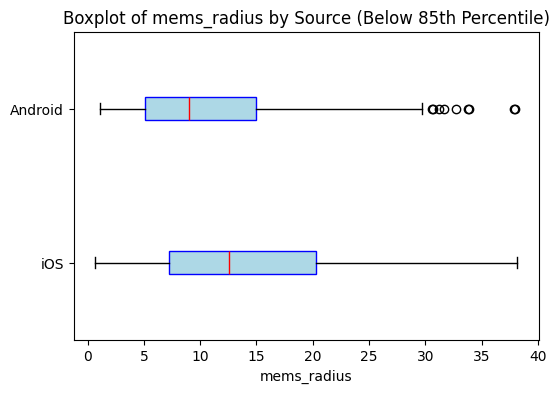

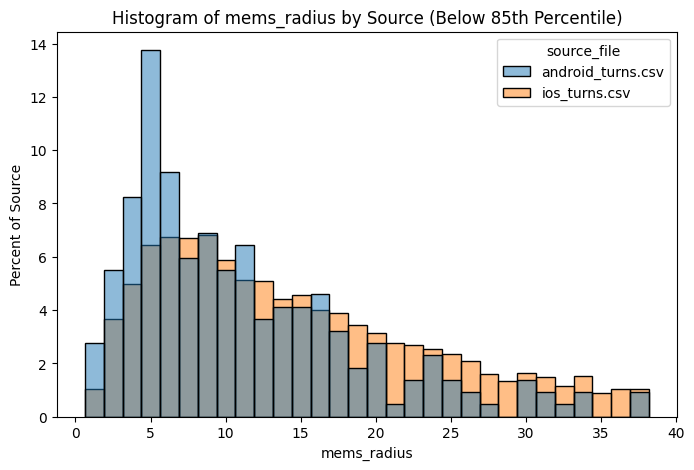

Original size: 7310
New size: 6213
Difference: 1097


In [41]:
# Compute 85th percentile threshold
Q = df['mems_radius'].quantile(0.85)

# Create a filtered copy without altering the original DataFrame
new_df = df[df['mems_radius'] <= Q].copy()

# ---------------------- BOX PLOT ----------------------
plt.figure(figsize=(6,4))

# Split filtered data by source
ios_data = new_df[new_df['is_ios'] == 1]['mems_radius']
android_data = new_df[new_df['is_ios'] == 0]['mems_radius']

# Make two horizontal boxplots side by side
plt.boxplot(
    [ios_data, android_data],
    vert=False,
    labels=["iOS", "Android"],
    patch_artist=True,   # enables color fill
    boxprops=dict(facecolor="lightblue", color="blue"),
    medianprops=dict(color="red"),
)

plt.title("Boxplot of mems_radius by Source (Below 85th Percentile)")
plt.xlabel("mems_radius")
plt.show()

# ---------------------- HISTOGRAM ----------------------
plt.figure(figsize=(8,5))
sns.histplot(
    data=new_df, 
    x="mems_radius", 
    hue="source_file", 
    stat="percent",        
    common_norm=False,     
    bins=30, 
    edgecolor="black"
)

plt.title("Histogram of mems_radius by Source (Below 85th Percentile)")
plt.xlabel("mems_radius")
plt.ylabel("Percent of Source")
plt.show()

print(f"Original size: {df.shape[0]}\nNew size: {new_df.shape[0]}\nDifference: {df.shape[0] - new_df.shape[0]}")

In [42]:
# Compute 95th percentile threshold
Q = df['mems_radius'].quantile(0.95)
df = df[df['mems_radius'] <= Q]

df.shape[0]

6944

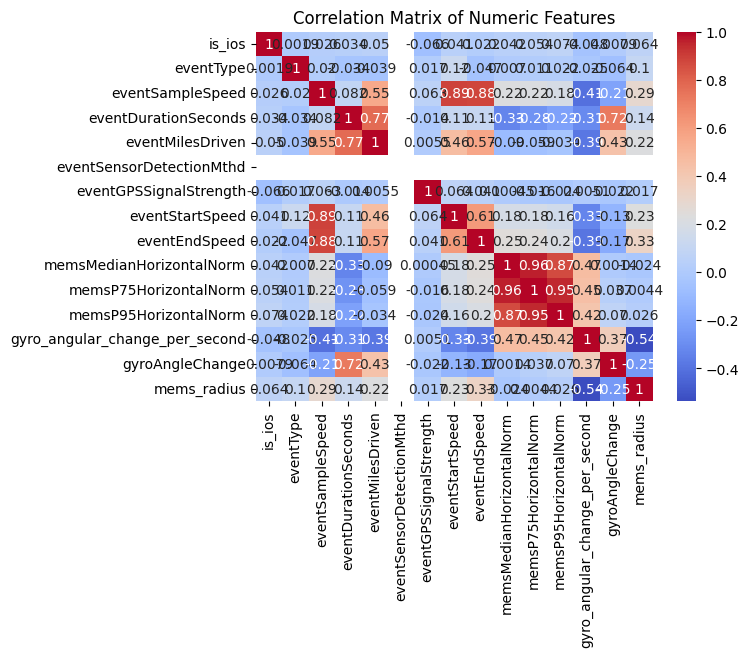

In [43]:
# Keep only numeric columns
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Compute correlations
corr_matrix = numeric_df.corr()

# Plot heatmap
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix of Numeric Features")
plt.show()

In [44]:
df.drop(columns=["memsP75HorizontalNorm", "memsP95HorizontalNorm"], inplace=True)

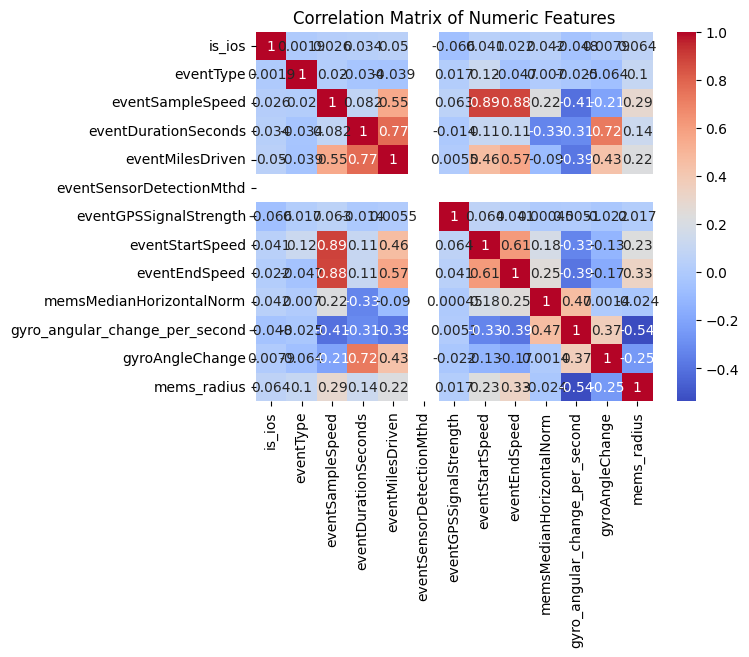

In [45]:
# Keep only numeric columns
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Compute correlations
corr_matrix = numeric_df.corr()

# Plot heatmap
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix of Numeric Features")
plt.show()

In [46]:
df.to_csv(root / "data" / "processed" / "merged"/ "state1_clean.csv", index=False) 